In [140]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [141]:
df = pd.DataFrame

In [142]:
#importar dados
dataset = pd.read_csv("limpezadados.csv", sep=",")
#visualizar
dataset.head()

,ID,Nome,Idade,E-mail,Cidade,Data_Cadastro,Valor_Compra,Status
0,1,Ana Silva,29.0,ana.silva@email.com,São Paulo,2024-01-10,250.75,ativo
1,2,Bruno Souza,35.0,bruno@email.com,Rio de Janeiro,2023-11-22,0.00,Inativo
2,3,Carla Lima,NaN,carla@email.com,Belo Horizonte,2024-03-05,150.00,Ativo
3,4,Diego Martins,42.0,NaN,São Paulo,2022-07-19,430.50,ativo
4,5,Elisa Rocha,23.0,elisa@email.com,Porto Alegre,2025-01-01,0.00,inativo


In [143]:
#tamanho 
dataset.shape

(7, 8)

In [144]:
#explorar dados categorias 
#estado
agrupado = dataset.groupby(['Cidade']).size()
agrupado

Cidade
Belo Horizonte    1
Porto Alegre      1
Recife            1
Rio de Janeiro    1
São Paulo         2
dtype: int64

<AxesSubplot:xlabel='Cidade'>

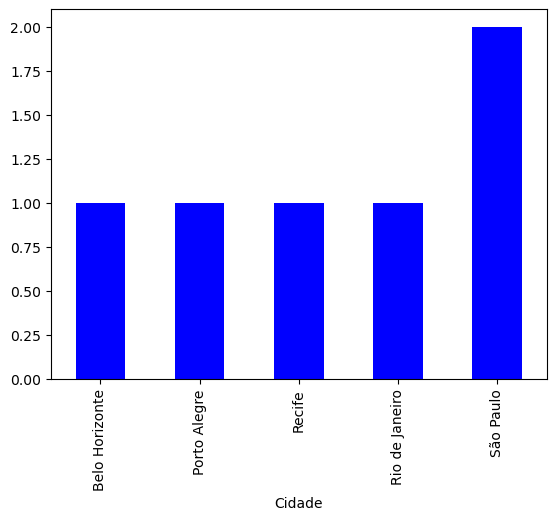

In [145]:
agrupado.plot.bar(color = 'blue')

In [146]:
#genero 
agrupado = dataset.groupby(['Status']).size()
agrupado

Status
ATIVO      1
Ativo      2
Inativo    1
ativo      2
inativo    1
dtype: int64

<AxesSubplot:xlabel='Status'>

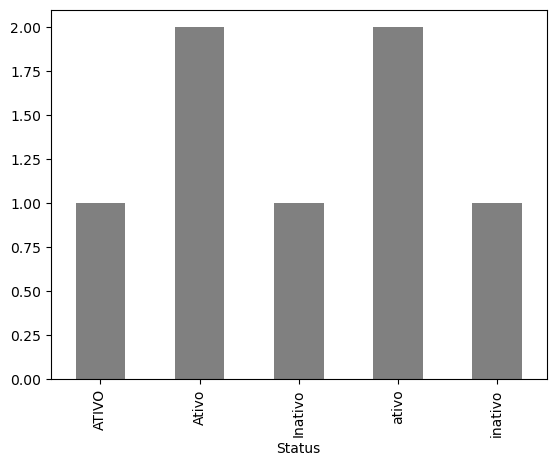

In [147]:
agrupado.plot.bar(color='gray')

In [148]:
#explorar colunas numéricos
#score
dataset['Valor_Compra'].describe()

count      6.000000
mean     185.241667
std      169.310958
min        0.000000
25%       37.500000
50%      200.375000
75%      272.837500
max      430.500000
Name: Valor_Compra, dtype: float64

Text(0.5, 1.0, 'Contagem por Cidade')

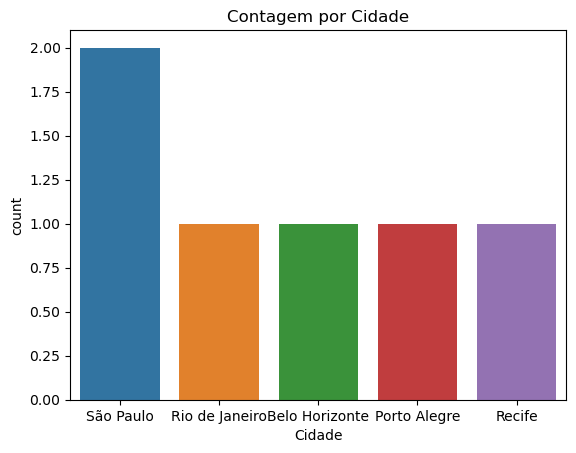

In [149]:
srn.countplot(x='Cidade', data=dataset).set_title('Contagem por Cidade')

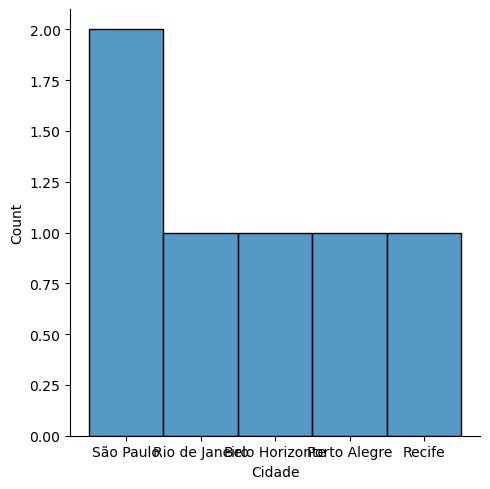

In [150]:
srn.displot(dataset['Cidade']).set_titles('Cidade')

In [151]:
#idade
dataset['Idade'].describe()

count     6.000000
mean     31.166667
std       6.645801
min      23.000000
25%      27.500000
50%      30.000000
75%      34.000000
max      42.000000
Name: Idade, dtype: float64

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Idade')

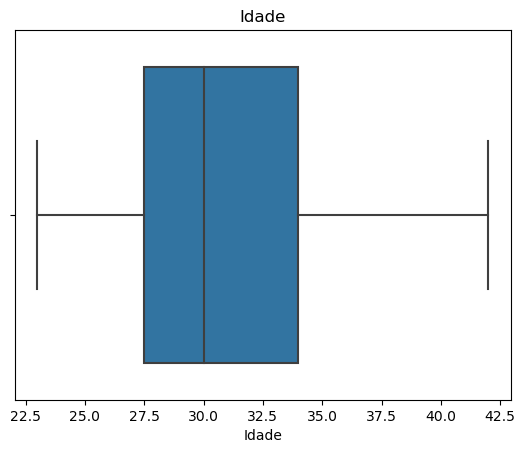

In [152]:
srn.boxplot(dataset['Idade']).set_title('Idade')

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Idade')

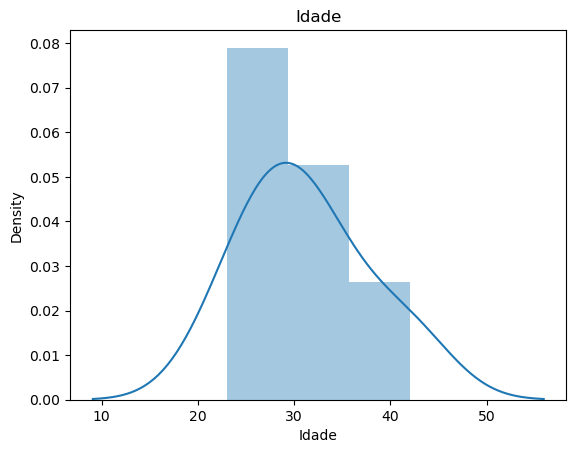

In [153]:
srn.distplot(dataset['Idade']).set_title('Idade')

In [154]:
#saldo 
dataset['Valor_Compra'].describe()

count      6.000000
mean     185.241667
std      169.310958
min        0.000000
25%       37.500000
50%      200.375000
75%      272.837500
max      430.500000
Name: Valor_Compra, dtype: float64

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Valor_Compra')

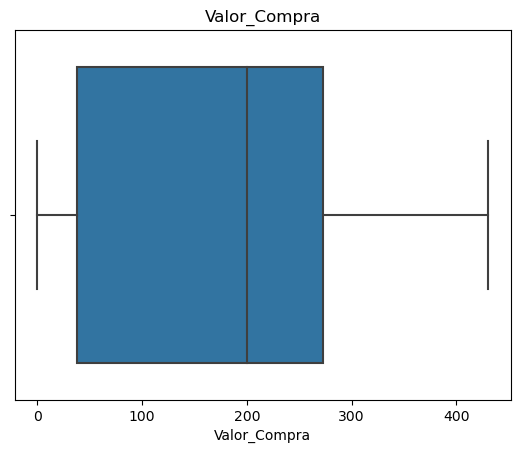

In [155]:
srn.boxplot(dataset['Valor_Compra']).set_title('Valor_Compra')

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Valor_Compra')

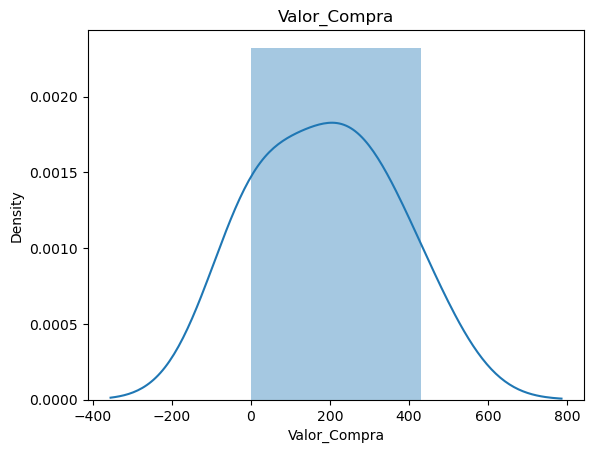

In [156]:
srn.distplot(dataset['Valor_Compra']).set_title('Valor_Compra')

In [157]:
#contamos valores NAN
#genero e salário
dataset['Status'].describe()

count         7
unique        5
top       ativo
freq          2
Name: Status, dtype: object

In [158]:
mediana = sts.median(dataset['Valor_Compra'])
mediana

250.75

In [159]:
#substituir NAN por mediana
dataset['Valor_Compra'].fillna(mediana, inplace=True)

In [160]:
# verificamos se NAN não existe mais 
dataset['Valor_Compra'].isnull().sum()

0